<a href="https://colab.research.google.com/github/Jacobanderson42/Project3/blob/master/Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get install libgeos-3.5.0
# !apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip
# !pip install pyproj==1.9.6

In [0]:
def EQmap(max_lat,min_lat,max_lon,min_lon,start_date,start_time,end_date,end_time,title):
  import requests
  import datetime as dt
  import pandas as pd
  import matplotlib.pyplot as plt
  import matplotlib.dates as md
  import numpy as np
  from mpl_toolkits.basemap import Basemap
  import math

  url = 'https://earthquake.usgs.gov/fdsnws/event/1/query.geojson?starttime='+start_date+'%20'+start_time+'&endtime='+end_date+'%20'+end_time+'&maxlatitude='+max_lat+'&minlatitude='+min_lat+'&maxlongitude='+max_lon+'&minlongitude='+min_lon+'&minmagnitude=2.5&orderby=time'
  r = requests.get(url)
  data = r.json()

  timestamps = [data['features'][i]['properties']['time']/1000 for i in range(len(data['features']))]
  lon = [data['features'][i]['geometry']['coordinates'][0] for i in range(len(data['features']))]
  lat = [data['features'][i]['geometry']['coordinates'][1] for i in range(len(data['features']))]
  mag = [data['features'][i]['properties']['mag'] for i in range(len(data['features']))]

  dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]

  lat_0 = (float(max_lat)+float(min_lat))/2
  lon_0 = (float(max_lon)+float(min_lon))/2
  w = max(math.cos(float(min_lat)),math.cos(float(max_lat)))
  map_height = (float(max_lat)-float(min_lat))*111E3+1E5
  map_width = (float(max_lon)-float(min_lon))*111E3*w+1E5

  plt.figure(figsize=(12,8))
  plt.xticks(rotation=25)
  ax=plt.gca()
  xfmt = md.DateFormatter('%Y-%m-%d')
  ax.xaxis.set_major_formatter(xfmt)
  plt.scatter(dates,mag)
  plt.title('Magnitude and Date for '+title)
  plt.xlabel('Date')
  plt.ylabel('Magnitude')

  fig = plt.figure(figsize=(12, 12))
  m = Basemap(projection='lcc', resolution='h', 
              lat_0=lat_0, lon_0=lon_0,
              width=map_width, height=map_height)
  m.bluemarble()
  m.drawcoastlines(color='gray')
  m.drawcountries(color='gray')
  m.drawstates(color='gray')

  s = [float(mag[i])**5*(map_width*1E-7) for i in range(len(mag))]
  m.scatter(lon, lat, latlon=True, s=s, alpha=.5, c='red')

  p = [3,5,7]
  for a in p:
      plt.scatter([], [], c='k', alpha=0.5, s=a**4*(map_width*1E-7),
                  label=str(a))
  plt.legend(scatterpoints=1, frameon=True,
            labelspacing=2, loc='lower left', borderpad=2)
  plt.title('Location and Magnitude for '+title)
  
  print('magnitudes for {} range from '.format(title)+str(min(mag))+' to '+str(max(mag)))
  print('average magnitude for {} is '.format(title)+str(np.mean(mag)))

magnitudes for 2010 to Current range from 2.5 to 6.8
average magnitude for 2010 to Current is 3.179289591692235
magnitudes for Transform Boundary range from 2.5 to 6.3
average magnitude for Transform Boundary is 3.530770877944325
magnitudes for Divergent Boundary range from 2.5 to 5.9
average magnitude for Divergent Boundary is 3.66093023255814
magnitudes for April 2015 range from 2.5 to 6.2
average magnitude for April 2015 is 3.278541666666667


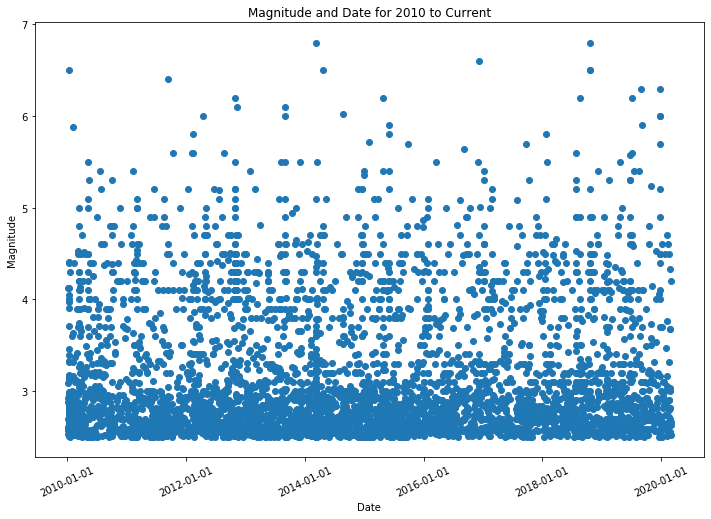

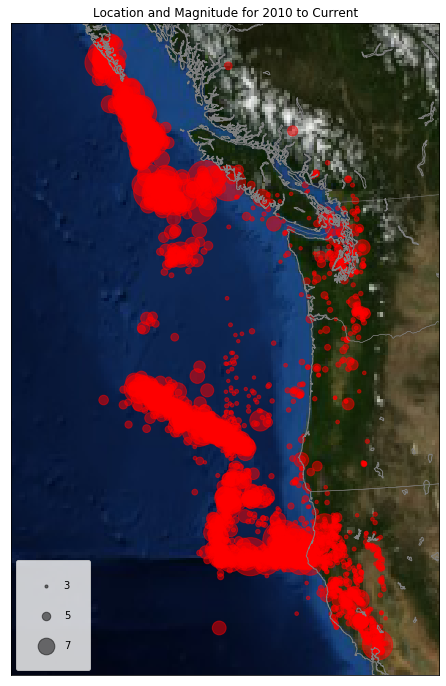

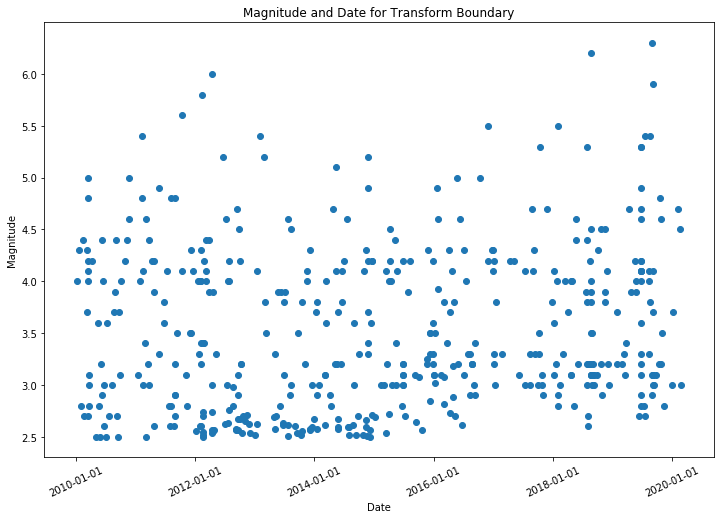

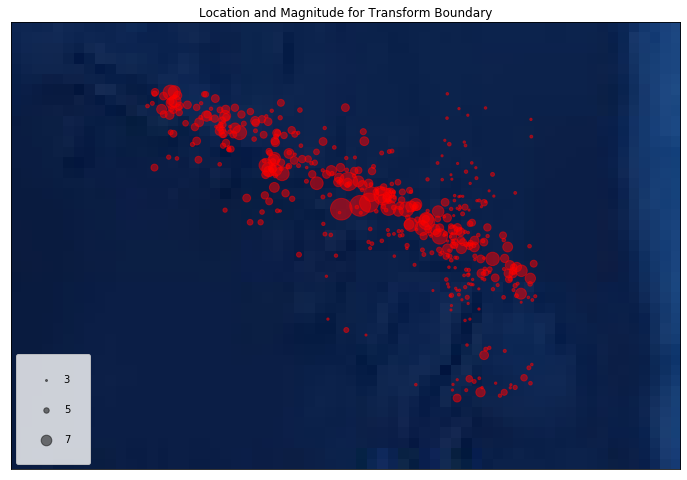

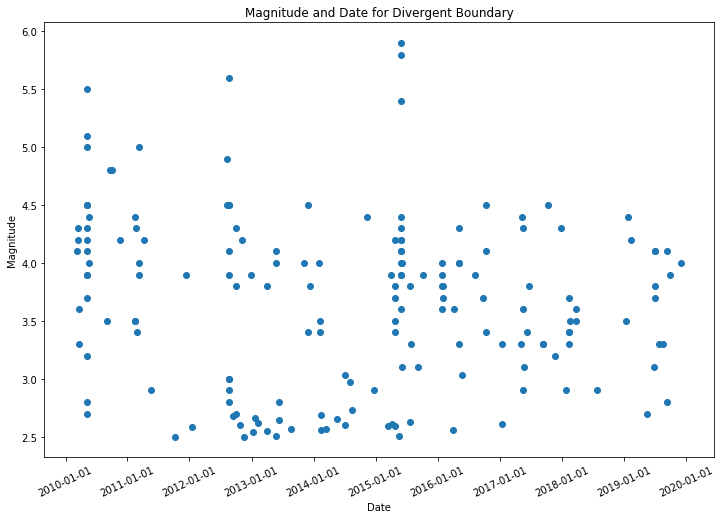

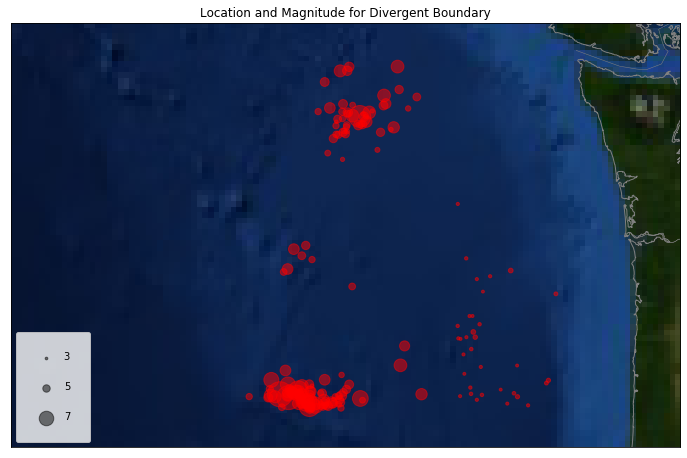

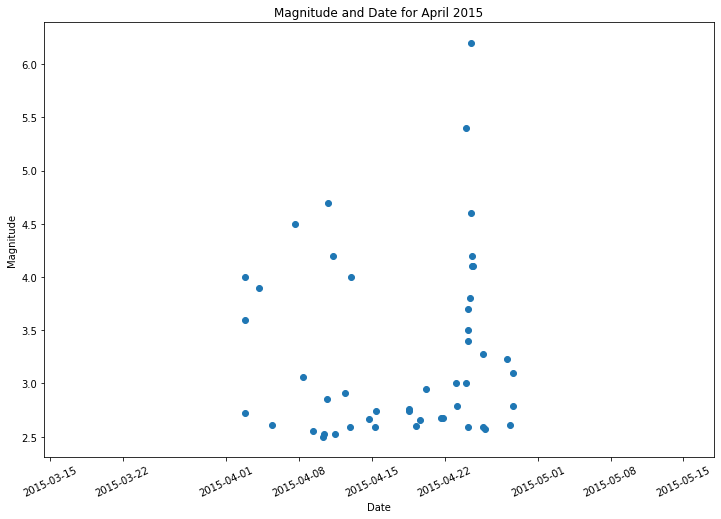

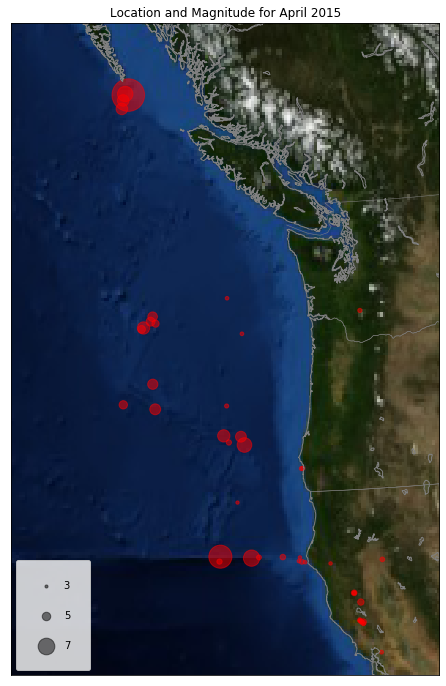

In [0]:
max_lat = '53'
min_lat = '38'
max_lon = '-122'
min_lon = '-132'
start_date = '2010-01-01'
start_time = '00:00:00'
end_date = '2020-03-02'
end_time = '23:59:59'
EQmap(max_lat,min_lat,max_lon,min_lon,start_date,start_time,end_date,end_time,'2010 to Current')
EQmap('44.28','42.34','-126.09','-129.6',start_date,start_time,end_date,end_time,'Transform Boundary')
EQmap('48.45','44.32','-125.14','-132.6',start_date,start_time,end_date,end_time,'Divergent Boundary')
EQmap(max_lat,min_lat,max_lon,min_lon,'2015-04-01',start_time,'2015-04-30',end_time,'April 2015')